In [124]:
from mlxtend.plotting import plot_decision_regions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from statistics import mode, multimode

In [125]:
df = pd.read_csv('A1_datasets/A1_datasets/polynomial200.csv')
df.columns = ['A', 'B']
df.loc[-1] = [17.685688, 39.256887]  
df.index = df.index + 1  
df.sort_index(inplace=True) 

In [126]:
 #Train-test split
#X_train = df['A'].iloc[0:100]
#X_train = X_train.values
#X_test = df['A'].iloc[101:200]
#X_test = X_test.values
#y_train = df['B'].iloc[0:100]
#y_train = y_train.values
#y_test = df['B'].iloc[101:200]
#y_test = y_test.values

In [127]:
X_train = df['A'].iloc[0:100]
X_train = X_train.values
X_test = df['A'].iloc[100:201]
X_test = X_test.values
y_train = df['B'].iloc[0:100]
y_train = y_train.values
y_test = df['B'].iloc[100:201]
y_test = y_test.values

In [128]:
X_train.size

100

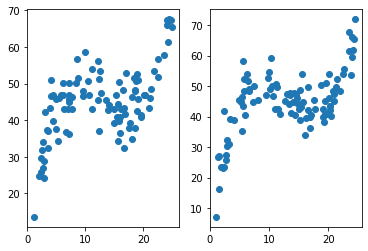

In [129]:
# Plot side by side
plt.subplot(1, 2, 1)
plt.scatter(X_train ,y_train)
plt.subplot(1, 2, 2)
plt.scatter(X_test,y_test)
plt.show()

In [145]:
y_train = np.log(y_train)
y_train
X_train_mean = X_train.mean()
X_train_sd = X_train.std()
X_train_st = (X_train - X_train_mean) / X_train_sd
#bordeaux_train["log(price)"] = np.log(bordeaux_train["price"])

In [153]:
#dists = np.linalg.norm(X_train_st - X_test)
#i_nearest = dists.sort_values().index[:5]

AttributeError: 'numpy.float64' object has no attribute 'sort_values'

In [154]:
lista = []
for row in range(len(X_test)):
    distances = np.linalg.norm(X_train - X_test[row])
    print(distances)
    nearest_neighbor_ids1 = distances.argsort()[:1]
    nearest_neighbor_rings1 = y_train[nearest_neighbor_ids1]
    nearest_neighbor_rings1 = mode(nearest_neighbor_rings1)
    lista.append(nearest_neighbor_rings1)
lista

73.86622505230974
69.02545712174785
103.6366568967463
69.70347571026291
93.26708361863703
75.01342044757213
73.78007143836385
77.34565221947975
91.7090304359351
130.69350420433202
82.20547609059443
71.64651811985068
117.98218422592595
132.7864240410292
106.44204922056929
122.96566950360409
133.4185316475597
84.88378157770406
90.59623347892644
68.93630368349373
131.76579700154247
135.82234020095692
97.700947242708
124.3334060442358
69.19195632299053
72.23128177110907
92.0805123307746
107.87458080027349
79.76715772449117
71.51896929020616
73.07546219844807
122.99245976149405
71.27097929858866
95.17421403420441
103.39641924188666
100.13361857066023
72.68972428353096
86.2527855495555
130.43699847568922
72.74349746528105
91.04586221619437
80.9278350401709
126.83679789851048
102.93625734834617
69.59731167086149
75.14178829584395
70.125153351266
120.31794701432499
115.03944114787411
101.39561923400997
81.99258285920935
97.27561995331735
98.87451926092704
99.08289315569176
99.77521852632103
69

[0.2625382781241161,
 0.2625382781241161,
 0.2625382781241161,
 0.2625382781241161,
 0.2625382781241161,
 0.2625382781241161,
 0.2625382781241161,
 0.2625382781241161,
 0.2625382781241161,
 0.2625382781241161,
 0.2625382781241161,
 0.2625382781241161,
 0.2625382781241161,
 0.2625382781241161,
 0.2625382781241161,
 0.2625382781241161,
 0.2625382781241161,
 0.2625382781241161,
 0.2625382781241161,
 0.2625382781241161,
 0.2625382781241161,
 0.2625382781241161,
 0.2625382781241161,
 0.2625382781241161,
 0.2625382781241161,
 0.2625382781241161,
 0.2625382781241161,
 0.2625382781241161,
 0.2625382781241161,
 0.2625382781241161,
 0.2625382781241161,
 0.2625382781241161,
 0.2625382781241161,
 0.2625382781241161,
 0.2625382781241161,
 0.2625382781241161,
 0.2625382781241161,
 0.2625382781241161,
 0.2625382781241161,
 0.2625382781241161,
 0.2625382781241161,
 0.2625382781241161,
 0.2625382781241161,
 0.2625382781241161,
 0.2625382781241161,
 0.2625382781241161,
 0.2625382781241161,
 0.2625382781

In [140]:
RMSE = np.sqrt(np.mean((y_test - lista)**2))
print(RMSE)

11.69939314263933


In [142]:
n_neigh = 1
y_pred = np.zeros(y_test.shape)
for row in range(len(X_test)):
    euclidian_distance = np.sqrt(np.sum((X_train - X_test[row])**2))
    y_pred[row] = y_train[np.argsort(euclidian_distance, axis = 0)[:n_neigh]].mean()
RMSE = np.sqrt(np.mean((y_test - y_pred)**2))
print(RMSE)

11.69939314263933


In [132]:
lista = []
for row in range(len(X_test)):
    distances = np.linalg.norm(X_train - X_test)
    nearest_neighbor_ids1 = distances.argsort()[:5]
    nearest_neighbor_rings1 = y_train[nearest_neighbor_ids1]
    nearest_neighbor_rings1 = mode(nearest_neighbor_rings1)
    lista.append(nearest_neighbor_rings1)

In [133]:
lista

[39.256887,
 39.256887,
 39.256887,
 39.256887,
 39.256887,
 39.256887,
 39.256887,
 39.256887,
 39.256887,
 39.256887,
 39.256887,
 39.256887,
 39.256887,
 39.256887,
 39.256887,
 39.256887,
 39.256887,
 39.256887,
 39.256887,
 39.256887,
 39.256887,
 39.256887,
 39.256887,
 39.256887,
 39.256887,
 39.256887,
 39.256887,
 39.256887,
 39.256887,
 39.256887,
 39.256887,
 39.256887,
 39.256887,
 39.256887,
 39.256887,
 39.256887,
 39.256887,
 39.256887,
 39.256887,
 39.256887,
 39.256887,
 39.256887,
 39.256887,
 39.256887,
 39.256887,
 39.256887,
 39.256887,
 39.256887,
 39.256887,
 39.256887,
 39.256887,
 39.256887,
 39.256887,
 39.256887,
 39.256887,
 39.256887,
 39.256887,
 39.256887,
 39.256887,
 39.256887,
 39.256887,
 39.256887,
 39.256887,
 39.256887,
 39.256887,
 39.256887,
 39.256887,
 39.256887,
 39.256887,
 39.256887,
 39.256887,
 39.256887,
 39.256887,
 39.256887,
 39.256887,
 39.256887,
 39.256887,
 39.256887,
 39.256887,
 39.256887,
 39.256887,
 39.256887,
 39.256887,
 39.

In [134]:
lista = []
k = 3
for index, row in df.iterrows():
    distances1 = np.linalg.norm(X - row[['A', 'B']], axis=1)
    nearest_neighbor_ids1 = distances1.argsort()[:k]
    nearest_neighbor_rings1 = y[nearest_neighbor_ids1]
    nearest_neighbor_rings1 = mode(nearest_neighbor_rings1)
    lista.append(nearest_neighbor_rings1)

NameError: name 'X' is not defined